In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

from sklearn.ensemble import HistGradientBoostingClassifier


# Load Data

First step is to ingest all the data we have available and merge them into a flattened datastructure containing all measurements. Indexes are ignored and rewritten to allow all readings to be added to the DF:

In [2]:
# parse the labels.csv
labels = pd.read_csv('labels.csv', index_col=0)

# grab filenames from the data directory
filenames = os.listdir('data')

dataframes = []

# parse and concatenate all csv files into df
for filename in filenames:
  if filename.endswith('.csv'):
    batch = pd.read_csv(os.path.join('data',filename), index_col=0)
    batch['batch'] = int(filename.replace('.csv', ''))
    dataframes.append(batch)

df = pd.concat(dataframes, ignore_index=True)

# print(df[:10])


In [3]:
# add label column (if it is not already available)
if (not 'label' in df.columns):
  df = df.merge(labels, left_on=["batch"], right_on=["id"])

def time_to_float(inputstr):
  hours, minutes, seconds = map(float, inputstr.split(':'))

  # return hours * 3600 + minutes * 60 + seconds
  # this is sufficient because hours should always be 0
  return minutes * 60 + seconds

if (not df['zeit'].dtype == 'category'):
  df['label'] = df['label'].astype('category')
if (not df['zeit'].dtype == 'float64'):
  df['zeit'] = df['zeit'].apply(time_to_float)

# print(df[:10])
# print(df['label'].value_counts())


# Test Data Preprocessing

In [4]:
X = df[['zeit','messwert','sensorid']]
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# print(X_train[:10])
# print(y_train[:10])


# Modelling

In [13]:
svm_clf = HistGradientBoostingClassifier(verbose=True, random_state=42, class_weight='balanced')
svm_clf.fit(X_train, y_train)


Binning 0.069 GB of training data: 0.128 s
Binning 0.008 GB of validation data: 0.006 s
Fitting gradient boosted rounds:
[1/100] 3 trees, 93 leaves (31 on avg), max depth = 14, train loss: 1.08617, val loss: 1.08601, in 0.135s
[2/100] 3 trees, 93 leaves (31 on avg), max depth = 14, train loss: 1.07740, val loss: 1.07712, in 0.116s
[3/100] 3 trees, 93 leaves (31 on avg), max depth = 14, train loss: 1.07091, val loss: 1.07051, in 0.115s
[4/100] 3 trees, 93 leaves (31 on avg), max depth = 14, train loss: 1.06588, val loss: 1.06544, in 0.123s
[5/100] 3 trees, 93 leaves (31 on avg), max depth = 14, train loss: 1.06199, val loss: 1.06150, in 0.120s
[6/100] 3 trees, 93 leaves (31 on avg), max depth = 14, train loss: 1.05887, val loss: 1.05834, in 0.117s
[7/100] 3 trees, 93 leaves (31 on avg), max depth = 12, train loss: 1.05647, val loss: 1.05590, in 0.120s
[8/100] 3 trees, 93 leaves (31 on avg), max depth = 13, train loss: 1.05447, val loss: 1.05389, in 0.114s
[9/100] 3 trees, 93 leaves (31 

HistGradientBoostingClassifier(random_state=42, verbose=True)

# Evaluation

0.4345837110862008


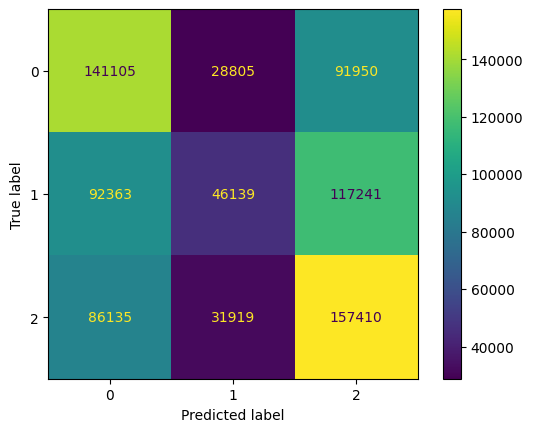

In [14]:
svm_y_pred = svm_clf.predict(X_test)

svm_acc = accuracy_score(y_test, svm_y_pred)
print(svm_acc)

svm_cm = confusion_matrix(y_test, svm_y_pred, labels=svm_clf.classes_)
svm_disp = ConfusionMatrixDisplay(confusion_matrix=svm_cm, display_labels=svm_clf.classes_)
svm_disp.plot()
plt.show()
